In [1]:
import numpy as np
from brian2 import *
import matplotlib.pyplot as plt

In [9]:
spike_times=np.load('/media/maria/DATA1/Documents/NeuroMatchAcademy2020_dat/random_spikes.npy',allow_pickle=True)
spike_clusters=np.arange(0,1000)

In [8]:
def bin_spikes(spike_times,spike_clusters, bin_size = 10):

    # Using clusters._phy_annotation.npy obtain valid clusters (i.e. >= 2)
    # valid_clusters_idx = np.array(np.where(clusters_annotation>=2))[0]

    spike_time_cells = np.empty(1000, dtype=object) # Initalise empty object
    for i in (np.arange(len(np.unique(spike_clusters)))):
      # Create a spike time arrays, where each array in the array is a spike time of a cell
      spike_time_cells[i] = spike_times[(np.where(spike_clusters == i)[0])]

    # Bin spike times into 10ms intervals
    spike_time_binned = np.empty(len(np.unique(spike_clusters)), dtype=object) # Initalise empty object
    sum_spikes = np.empty(len(np.unique(spike_clusters)), dtype=object) # Initalise empty object

    for cell_num in np.arange(len(spike_time_cells)):
        spike_time_hist = np.histogram(spike_time_cells[cell_num],bins = np.arange(0,np.floor(spike_time_cells[cell_num][-1]),bin_size))
        spike_time_binned[cell_num] = spike_time_hist[0][:1000]

    # Spike_time_binned returns binned spikes sorted into cells
    # Spike_time_cells returns UNbinned spikes sorted into cells
    # cell_spikes_max returns a single cell index that has the max number of spikes (i.e most active cell)
    return spike_time_binned

In [35]:
def concat(spike_times,spike_clusters):
    spike_lst=[]
    clusters_lst=[]
    for j in range(len(spike_times)):
        spike_lst=spike_lst+list(spike_times[j].flatten())
        clusters_lst=clusters_lst+[j]*len(spike_times[j])
    return spike_lst, clusters_lst

In [25]:
spike_times_,spike_clusters_=concat(spike_times,spike_clusters)

In [28]:
spike_times_=np.array(spike_times_)
spike_clusters=np.array(spike_clusters_)

In [30]:
print(spike_times_)

[3.01200000e+02 5.00700000e+02 5.28266667e+02 ... 3.13876520e+06
 3.13877720e+06 3.19423319e+06]


In [36]:
spike_time_binned=bin_spikes(spike_times_,spike_clusters_,bin_size = 10)

In [18]:
np.save('spike_time_binned_random.npy',spike_time_binned)

In [2]:
spike_time_binned=np.load('spike_time_binned_random.npy',allow_pickle=True)

In [3]:
def get_rates(spike_time_binned):
    rates=[]
    for cell in range(spike_time_binned.shape[0]):
        print(np.sum(spike_time_binned[cell]))
        rates.append(np.sum(spike_time_binned[cell])/(10))
    return rates

In [4]:
rates=get_rates(spike_time_binned)

68
6
6
7
1
0
0
0
0
0
200
3
21
20
10
2
0
0
2
4
11
71
1
3
23
3
240
28
3
5
159
83
0
10
8
0
31
329
4
37
71
12
0
0
1
134
1
9
12
19
6
0
14
7
57
0
7
0
1
0
27
73
108
0
2
0
0
12
0
0
0
1
0
0
77
1
0
0
0
25
2
61
1
112
53
24
18
70
13
0
87
90
21
1
7
1
14
24
3
15
1
6
10
0
7
0
0
15
0
3
36
1
0
0
1
0
45
10
1
3
28
18
0
3
3
8
1
8
25
0
14
18
0
1
2
6
0
4
0
49
0
26
16
10
22
6
2
17
45
0
2
0
1
0
0
9
0
2
10
1
0
2
0
30
10
21
2
5
0
0
15
5
16
4
0
1
1
0
1
0
10
1
14
28
7
0
0
0
17
18
1
62
4
4
1
21
1
3
0
2
22
4
1
0
25
1
0
25
27
0
0
8
15
124
10
1
56
103
6
47
16
0
0
4
0
44
21
37
1
3
13
31
3
9
0
0
0
131
12
0
7
1
50
8
22
47
3
0
24
16
12
5
1
3
8
8
0
1
55
24
9
23
23
2
28
26
354
0
3
15
28
0
34
15
3
2
122
144
4
3
42
4
180
88
4
0
57
3
1
128
66
2
13
6
10
2
243
0
993
378
16
0
79
59
36
25
20
18
39
7
7
0
8
0
0
0
62
29
1
8
0
2
3
0
24
70
0
2
7
0
6
0
52
7
15
20
1
5
6
71
0
6
0
1
0
7
1
1
4
13
6
9
45
4
2
93
93
0
0
11
15
0
2
2
0
25
4
0
4
2
8
2
4
9
1
20
0
2
0
224
0
5
43
1
11
41
20
21
5
22
270
101
81
3
13
3
0
0
86
0
4
13
3
0
6
0
11
10
45
7

In [5]:
rates=np.array(rates)+1

In [6]:
rates

array([  7.8,   1.6,   1.6,   1.7,   1.1,   1. ,   1. ,   1. ,   1. ,
         1. ,  21. ,   1.3,   3.1,   3. ,   2. ,   1.2,   1. ,   1. ,
         1.2,   1.4,   2.1,   8.1,   1.1,   1.3,   3.3,   1.3,  25. ,
         3.8,   1.3,   1.5,  16.9,   9.3,   1. ,   2. ,   1.8,   1. ,
         4.1,  33.9,   1.4,   4.7,   8.1,   2.2,   1. ,   1. ,   1.1,
        14.4,   1.1,   1.9,   2.2,   2.9,   1.6,   1. ,   2.4,   1.7,
         6.7,   1. ,   1.7,   1. ,   1.1,   1. ,   3.7,   8.3,  11.8,
         1. ,   1.2,   1. ,   1. ,   2.2,   1. ,   1. ,   1. ,   1.1,
         1. ,   1. ,   8.7,   1.1,   1. ,   1. ,   1. ,   3.5,   1.2,
         7.1,   1.1,  12.2,   6.3,   3.4,   2.8,   8. ,   2.3,   1. ,
         9.7,  10. ,   3.1,   1.1,   1.7,   1.1,   2.4,   3.4,   1.3,
         2.5,   1.1,   1.6,   2. ,   1. ,   1.7,   1. ,   1. ,   2.5,
         1. ,   1.3,   4.6,   1.1,   1. ,   1. ,   1.1,   1. ,   5.5,
         2. ,   1.1,   1.3,   3.8,   2.8,   1. ,   1.3,   1.3,   1.8,
         1.1,   1.8,

In [23]:
#Simulate Poisson
defaultclock.dt = 0.1*ms
spikes_gen=PoissonGroup(1000,rates=rates*Hz)
Minput = SpikeMonitor(spikes_gen)
duration=100000*ms
run(duration)

WARNING    "rates" is an internal variable of group "poissongroup_1", but also exists in the run namespace with the value array([7.8, 1.6, 1.6, ..., 3.9, 1. , 1. ]). The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


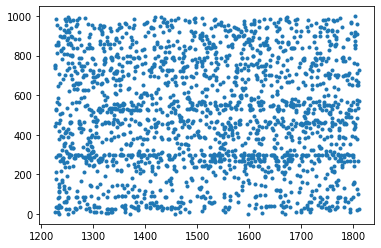

In [23]:
plot(Minput.t[4000:6000]/ms, Minput.i[4000:6000], '.')

In [91]:
np.save('M_t.npy',np.array(Minput.t))
np.save('M_i.npy',np.array(Minput.i))

In [24]:
bin_poisson=bin_spikes(np.array(Minput.t)*1000,np.array(Minput.i))

In [10]:
bin_poisson[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

# Off-manifold?

In [14]:
def convert(spike_times_binned):
    lst=[]
    for j in range(1000):
        lst.append(list(spike_times_binned[j]))
    return np.array(lst)

In [16]:
spike_time_binned=convert(spike_time_binned)

In [17]:
print(spike_time_binned.shape)

(1000, 1000)


In [25]:
bin_poisson_=convert(bin_poisson)

In [26]:
bin_poisson_.shape

(1000, 1000)

In [19]:
spike_time_binned=spike_time_binned.T

In [27]:
bin_poisson=bin_poisson_.T

In [28]:
from sklearn.decomposition import PCA

pca=PCA(n_components=10)
pcs_np=pca.fit_transform(spike_time_binned)
print(pcs_np.shape)

(1000, 10)


In [29]:
from sklearn.decomposition import PCA

pca=PCA(n_components=10)
pcs_pn=pca.fit_transform(bin_poisson)
print(pcs_pn.shape)

(1000, 10)


In [40]:
X=np.linalg.inv(pcs_np.T@pcs_np)@pcs_np.T@pcs_pn
print(X.shape)

(10, 10)


In [42]:
pcs_np.shape

(1000, 10)

In [43]:
pr=pcs_np@X

In [44]:
pr.shape

(1000, 10)

In [57]:
np.dot(pr.T,pcs_pn)

array([[ 8.26490151,  0.83785328, -3.546229  ,  0.74877934, -0.78419673,
         1.71504302,  2.21980054, -0.85123515,  0.09784422,  0.63952246],
       [ 0.83785328,  7.49085171,  4.92694286,  4.05717139, -0.70577228,
         1.45569912,  0.48400286, -0.56531313,  1.38888625, -1.93869201],
       [-3.546229  ,  4.92694286, 10.34733551,  1.95144184,  2.93150545,
         0.43171061, -2.59429732,  0.03528828,  0.01299881, -3.98792122],
       [ 0.74877934,  4.05717139,  1.95144184,  5.16016234,  0.5201025 ,
         1.55898952,  3.70109914, -2.20518353,  1.22398378, -0.71014703],
       [-0.78419673, -0.70577228,  2.93150545,  0.5201025 ,  3.7382481 ,
        -0.38740399,  0.68436681, -0.49733818, -1.27380403, -0.26912556],
       [ 1.71504302,  1.45569912,  0.43171061,  1.55898952, -0.38740399,
         2.58697893,  1.17633498, -0.81296242, -0.03884137, -0.55811227],
       [ 2.21980054,  0.48400286, -2.59429732,  3.70109914,  0.68436681,
         1.17633498,  6.97566133, -1.74809412

In [54]:
pr.shape

(1000, 10)

In [55]:
pcs_pn.shape

(1000, 10)

In [61]:
lst=[]
for j in range(0,10):
    dt=np.dot(pr[j,:],pcs_pn[j,:])
    normalizer=np.linalg.norm(pr[j,:])*np.linalg.norm(pcs_pn[j,:])
    angle=np.arccos(dt/normalizer)*57
    lst.append(angle)
    print(angle)

74.49466267879299
69.715635342447
91.93434643569258
75.41085989833655
93.68621564574653
60.12346058656993
89.68127230182436
130.88321617430793
88.6995947684197
106.8173643995249


(array([1., 1., 2., 0., 4., 0., 1., 0., 0., 1.]),
 array([ 60.12346059,  67.19943615,  74.2754117 ,  81.35138726,
         88.42736282,  95.50333838, 102.57931394, 109.6552895 ,
        116.73126506, 123.80724062, 130.88321617]),
 <BarContainer object of 10 artists>)

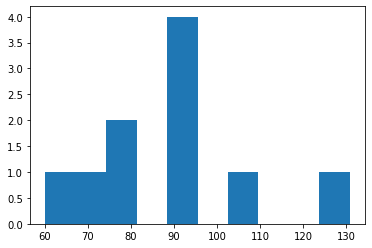

In [62]:
import matplotlib.pyplot as plt

plt.hist(lst)

In [64]:
np.save('binned_poisson.npy',bin_poisson.T)

In [72]:
spike_time_binned=np.load('spike_time_binned_random.npy')

In [73]:
bin_poisson=np.load('binned_poisson.npy')

In [80]:
pca=PCA(n_components=80)
pca.fit(bin_poisson.T)
var_exp_poisson=pca.explained_variance_ratio_

In [81]:
pca=PCA(n_components=50)
pca.fit(spike_time_binned.T)
var_exp=pca.explained_variance_ratio_

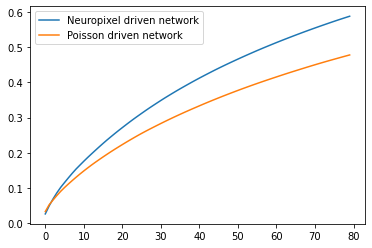

In [82]:
plt.plot(np.cumsum(var_exp),label='Neuropixel driven network')
plt.plot(np.cumsum(var_exp_poisson),label='Poisson driven network')
plt.legend()

In [89]:
def compute_angles_without_pca_on_poisson(np_activations, poisson_activations):
    pca=PCA(n_components=10)
    pcs_np=pca.fit_transform(np_activations)
    X=np.linalg.inv(pcs_np.T@pcs_np)@pcs_np.T@poisson_activations
    pr=pcs_np@X
    dot_lst=[]
    for j in range(0,poisson_activations.shape[0]):
        dt=np.dot(pr[j,:],poisson_activations[j,:])
        normalizer=np.linalg.norm(pr[j,:])*np.linalg.norm(poisson_activations[j,:])
        angle=np.arccos(dt/normalizer)*57
        dot_lst.append(angle)
        print(angle)
    plt.hist(dot_lst)
    return lst
    

81.84015042475475
85.95889880430414
83.95417870335731
89.51045374749607
89.0738781854676
80.73407004024843
78.48329980974955
94.1051602783445
84.78939402564626
85.8080480864746
88.37688266818968
84.55421328928497
86.14666431864498
85.8592078636139
88.97814338480406
97.5465422773121
85.86616599867381
86.4605367855682
84.60798349570041
89.1009195495585
85.35688088986238
84.0308530118031
81.08131822964812
89.40360550829693
84.16874086133275
86.23338318792187
78.35013010798518
81.7478605404563
90.98564762418592
93.17758765153066
84.79096447472891
83.22441221276105
83.60618505426798
77.38059911065065
84.89383873442438
82.61787021104632
87.92538182409692
84.51457805896777
83.74307762669673
84.47129459948445
85.97632577541168
85.1814073704542
84.39057465165176
89.70057144034179
90.75212184199415
81.71595365808408
85.48617222249031
90.04794852890993
85.50028558552724
90.25722109737721
91.39427510832776
83.82347437987707
86.23734049059419
87.43415025867074
87.79618026896784
84.72419129189952
86

85.19520196053715
95.93190005187118
90.78534607768498
92.88546821308749
79.364238048168
83.09588154105714
80.61066634970653
82.42019909216764
88.99846071380306


[74.49466267879299,
 69.715635342447,
 91.93434643569258,
 75.41085989833655,
 93.68621564574653,
 60.12346058656993,
 89.68127230182436,
 130.88321617430793,
 88.6995947684197,
 106.8173643995249]

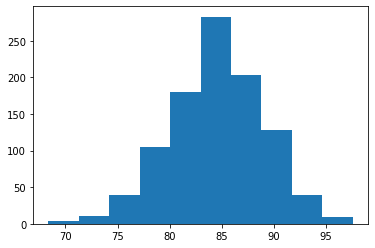

In [90]:
compute_angles_without_pca_on_poisson(spike_time_binned.T, bin_poisson.T)